# Pymaceuticals Inc.
---

### Analysis

- 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [22]:
mouse_metadata_path = (r"C:\Users\ashle\Pymaceuticals\Resources\Mouse_metadata.csv")
study_results_path = (r"C:\Users\ashle\Pymaceuticals\Resources\Study_results.csv")

In [23]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [25]:
combinded_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combinded_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [26]:
mouse_count = combinded_data_df["Mouse ID"].nunique()
mouse_count

249

In [30]:
duplicate_mouse_ids = combinded_data_df[combinded_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [54]:
mouse_id_filtered_df = combinded_data_df[combinded_data_df['Mouse ID'] == 'g989']
mouse_id_filtered_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [73]:
clean_mouse_id_filtered_df = combinded_data_df.drop_duplicates()
clean_mouse_id_filtered_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [74]:
clean_mouse_count = clean_mouse_id_filtered_df["Mouse ID"].nunique()
clean_mouse_count

249

# Summary Statistics

In [77]:
tumor = clean_mouse_id_filtered_df.groupby(['Drug Regimen'])

tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({
                        "Mean Tumor Volume": tumor_mean,
                        "Median Tumor Volume" : tumor_med,
                        "Tumor Volume Variance" : tumor_var,
                        "Tumor Volume Std. Dev." : tumor_std,
                        "Tumor Volume Std. Err." : tumor_sem
})
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [80]:
tumor2 = clean_mouse_id_filtered_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


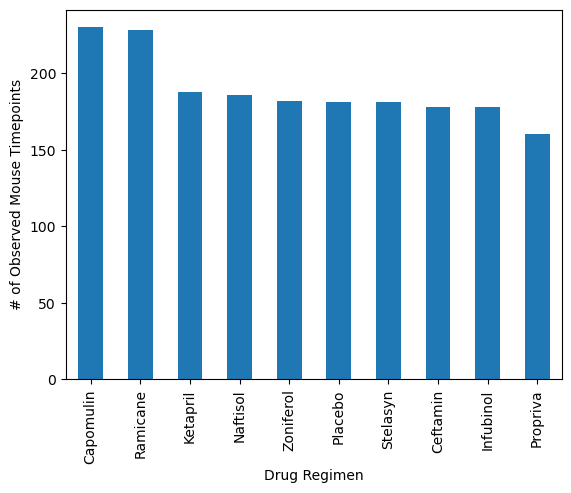

In [92]:
timepoint = clean_mouse_id_filtered_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.sort_values(ascending=False).plot.bar()  
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

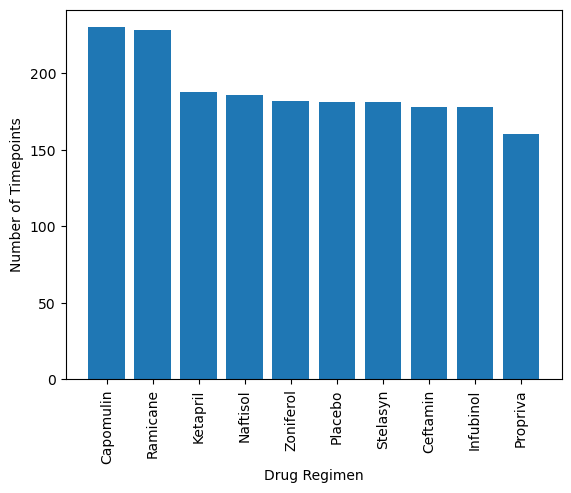

In [93]:
timepoint_desc = timepoint.sort_values(ascending=False)
plt.bar(timepoint_desc.index, timepoint_desc.values)
plt.ylabel('Number of Timepoints', size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

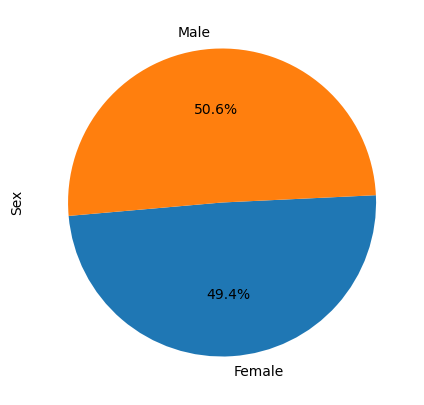

In [94]:
sex = clean_mouse_id_filtered_df.groupby(['Sex'])['Sex'].count()

sex.plot.pie(startangle=185, autopct='%1.1f%%', figsize=(5,5))
plt.show()

In [95]:
sex_df = pd.DataFrame(sex)
sex_df

,Sex
Sex,
Female,934
Male,958


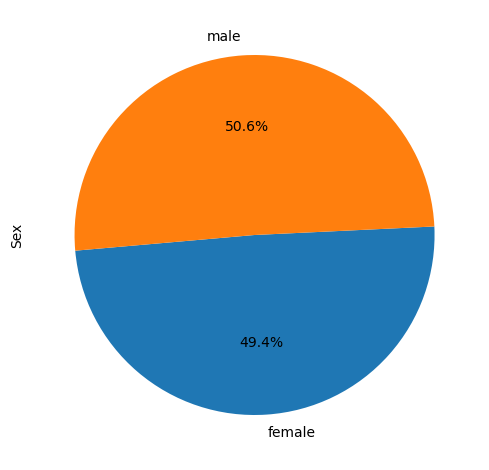

In [96]:
plt.pie(sex, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

# Quartiles, Outliers, and Boxplots

In [99]:
last_time = clean_mouse_id_filtered_df.groupby(['Mouse ID'])['Timepoint'].max()
last_time_df = pd.DataFrame(last_time)
last_time_df.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [101]:
last_time_df = pd.merge(clean_mouse_id_filtered_df, last_time_df, on=('Mouse ID', 'Timepoint'), how='right')
last_time_df.head()

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,a203,Infubinol,Female,20,23,45,67.973419,2,Infubinol,Female,20,23,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1,Infubinol,Female,21,25,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4,Placebo,Female,17,29,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1,Stelasyn,Female,16,29,63.440686,1


In [119]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_volume_data = []

In [120]:
outliers_dict = {}

for treatment in treatments:
    
    treatment_data = last_time_df[last_time_df['Drug Regimen_x'] == treatment]

In [122]:
tumor_volume_data.append(treatment_data['Tumor Volume (mm3)_x'])

In [135]:
Q1 = treatment_data['Tumor Volume (mm3)_x'].quantile(0.25)
Q3 = treatment_data['Tumor Volume (mm3)_x'].quantile(0.75)
IQR = Q3 - Q1

IQR

15.577752179999997